Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [111]:
%matplotlib inline
import nsfg
import math
df = nsfg.ReadFemPreg()

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index(['caseid', 'rscrinf', 'rdormres', 'rostscrn', 'rscreenhisp',
       'rscreenrace', 'age_a', 'age_r', 'cmbirth', 'agescrn',
       ...
       'pubassis_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt', 'secu_r',
       'sest', 'cmintvw', 'cmlstyr', 'screentime', 'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [6]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print (type(hist))
print (hist)

<class 'thinkstats2.Hist'>
Hist({1: 299, 2: 301, 3: 266, 4: 421, 5: 445, 6: 559, 7: 583, 8: 606, 9: 607, 10: 468, 11: 647, 12: 658, 13: 623, 14: 1160})


Display the histogram.

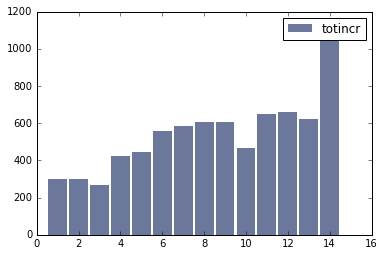

In [7]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

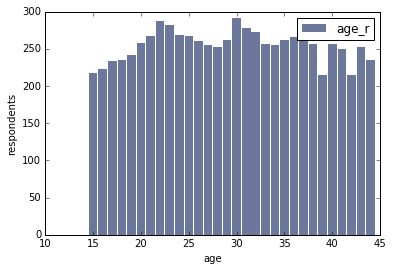

In [9]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show(xlabel = 'age', ylabel = 'respondents')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

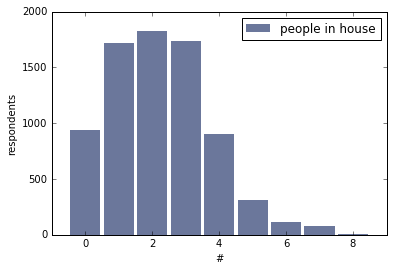

In [10]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='people in house')
thinkplot.Show(xlabel = '#', ylabel = 'respondents')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?
#Response: 
#Respondents heavily weighted on the side of having either no or only one or two children. Five and greater children is almost not seen, decreasing off to the right.

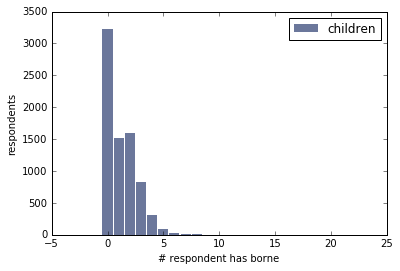

In [11]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='children')
thinkplot.Show(xlabel = '# respondent has borne', ylabel = 'respondents')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [14]:
hist = thinkstats2.Hist(resp.parity)
hist = hist.Largest
print (hist)

<bound method _DictWrapper.Largest of Hist({0: 3230, 1: 1519, 2: 1603, 3: 828, 4: 309, 5: 95, 6: 29, 7: 15, 8: 8, 9: 2, 10: 3, 16: 1, 22: 1})>


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

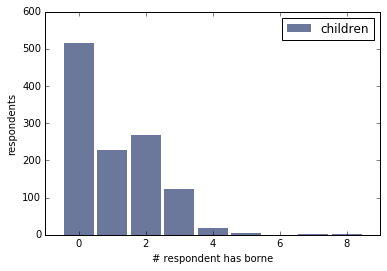

In [77]:
high = resp.loc[resp['totincr'] == 14]
hist = thinkstats2.Hist(high.parity)
thinkplot.Hist(hist, label='children')
thinkplot.Show(xlabel = '# respondent has borne', ylabel = 'respondents')



Find the largest parities for high income respondents.

In [81]:
hist.Largest

<bound method _DictWrapper.Largest of Hist({0: 515, 1: 229, 2: 267, 3: 123, 4: 19, 5: 5, 7: 1, 8: 1})>

Compare the mean <tt>parity</tt> for high income respondents and others.

In [91]:
high = resp.loc[resp['totincr'] == 14]
medhi = resp.loc[resp['totincr'] == 13]
lowhi = resp.loc[resp['totincr'] == 2]
low = resp.loc[resp['totincr'] == 1]
print('income 75k or more: ' + str(high.parity.mean()))
print('income 64k - 74k: ' + str(medhi.parity.mean()))
print('income 5k - 7.5k: ' + str(lowhi.parity.mean()))
print('income < 5k: ' + str(low.parity.mean()))

income 75k or more: 1.0758620689655172
income 64k - 74k: 0.9935794542536116
income 5k - 7.5k: 1.5016611295681064
income < 5k: 1.2876254180602007


Investigate any other variables that look interesting.

In [95]:
#print (resp.rscreenrace)
white = resp.loc[resp['rscreenrace'] == 5]
black = resp.loc[resp['rscreenrace'] == 4]
print('white parity: ' + str(white.parity.mean()))
print('black/african american: ' + str(black.parity.mean()))

white parity: 1.1427254287294855
black/african american: 1.4937388193202146


### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 
### Response:
Difference in pregnancy length's effect on weight was much smaller.

In [127]:
#df.totalwgt_lb
first = df.loc[df['birthord'] == 1]
firstw = first.totalwgt_lb.value_counts().sort_index()
group2 = first.loc[first['totalwgt_lb'] <= 2]
group1 = first.loc[first['totalwgt_lb'] >= 10]
#print(group1, group2)

diff = group1.totalwgt_lb.mean() - group2.totalwgt_lb.mean()

var1 = group1.totalwgt_lb.var()
var2 = group2.totalwgt_lb.var()
n1, n2 = len(group1.totalwgt_lb), len(group2.totalwgt_lb)
pooled_var = (n1 *var1 + n2 *var2) / (n1 + n2)
d = diff / math.sqrt(pooled_var)
print (d)




group2 = df.loc[df['prglngth'] <= 13]
group1 = df.loc[df['prglngth'] >= 27]
#print(group1, group2)

diff = group1.totalwgt_lb.mean() - group2.totalwgt_lb.mean()

var1 = group1.totalwgt_lb.var()
var2 = group2.totalwgt_lb.var()
n1, n2 = len(group1.totalwgt_lb), len(group2.totalwgt_lb)
pooled_var = (n1 *var1 + n2 *var2) / (n1 + n2)
d = diff / math.sqrt(pooled_var)
print ('d of pregnancy length: '+str(d))


10.705838152592971
d of pregnancy length: 0.10774080160869334
